In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('StudentsPerformance.csv')

In [2]:
# Mapping for parental education level
mapping = {
    "bachelor's degree": 1,
    'some college': 2,
    "master's degree": 3,
    "associate's degree": 4
}

# Encode education level
data['encoded_education_level'] = data['parental level of education'].map(mapping)

Since the feature parental level of education is a string type and we cannot map a string type we want to convert it into a numeric type for which we are using mapping. I have mapped the variables inside parental level of education into encoded_education_level 

In [3]:
# Dropping NaN values
data = data.dropna()

In [4]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [5]:
# Prepare training data
X_train = train_set[["math score", "reading score", "writing score"]]
y_train = train_set["encoded_education_level"]

# Evaluate the model
X_test = test_set[["math score", "reading score", "writing score"]]
y_test = test_set["encoded_education_level"]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Defines the regression model
model = LinearRegression()

In [8]:
# Build training model
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.009481292401256503


A R2 score of 0.009481292401256503 could indicate model is not effectively explaining the variability in the data and is likely not a good fit for the given dataset. This means model is not capturing the true relationship between the independent and dependent variables.

In [9]:
# Evaluate the model with the test data find the MSE and R2
y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
rms_error = mean_squared_error(y_test, y_pred)

## Prediction results

In [10]:
print("R2 Score:", r2)
print("Root Mean Squared Error(MSE):", rms_error)

R2 Score: -0.008127987869033682
Root Mean Squared Error(MSE): 1.410024259000951


An R2 score of -0.008127987869033682 indicates that the linear regression model performs worse than a model that simply predicts the mean of the dependent variable.
Where as an RMSE of 1.410024259000951 suggests that, on average, the model's predictions are off by approximately 1.41 units of the dependent variable

Overall this means that the linear regression is not effectively capturing the relationship between math,reading,writing score and parental level of education

In [11]:
working_set = train_set.copy()

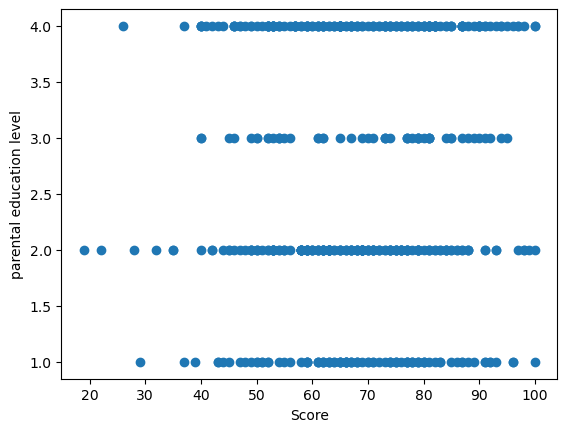

In [12]:
import matplotlib.pyplot as plt
plt.scatter(working_set["math score"], working_set["encoded_education_level"])
plt.xlabel("Score")
plt.ylabel("parental education level");
plt.show()

On the above graph y axis 1 represents bachelors degree, 2 represents some college, 3 represents master's degree, and 4 represents associate's degree and x axis the math score

Since i am using multiple features and this looks like a classification problem I can't do the linear regression model on this. I would still want to combine 3 features and try to do the linear regression model which I am doing below on second set.
Also this graph shows relation of just the writing score and parental education level. I have done a graph on total score and parental education level on the second set. 


### Now I would like to make a new feature Total_Score which will be the sum of the math, reading and writing score 

In [13]:
second_set = data.copy()

In [14]:
second_set["Total_Score"] = second_set["math score"] + second_set["reading score"] + second_set["writing score"]

In [15]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
train_set, test_set = train_test_split(second_set, test_size=0.2, random_state=42)

In [16]:
# Prepare training data
X_train = train_set[["Total_Score"]]
y_train = train_set["encoded_education_level"]

# Evaluate the model
X_test = test_set[["Total_Score"]]
y_test = test_set["encoded_education_level"]

In [17]:
# Build training model
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.00030304875264952624


A R2 score of 0.0003030487 could indicate model is not effectively explaining the variability in the data and is likely not a good fit for the given dataset. This means model is not capturing the true relationship between the total score and parental education level.

In [18]:
# Evaluate the model with the test data find the MSE and R2
y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
rms_error = mean_squared_error(y_test, y_pred)

In [19]:
print("R2 Score:", r2)
print("Root Mean Squared Error(MSE):", rms_error)

R2 Score: -0.011741957115891655
Root Mean Squared Error(MSE): 1.4150789587718846


Like above again we got similar values for R2 score and Root Mean Squared Error which overall this means that the linear regression is not effectively capturing the relationship between math,reading,writing score and parental level of education

In [20]:
working_set = train_set.copy()

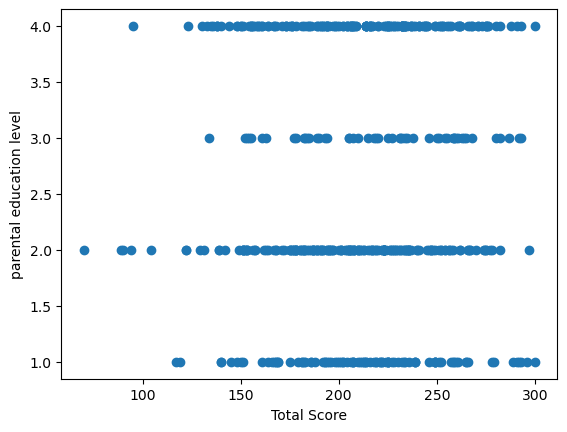

In [21]:
import matplotlib.pyplot as plt
plt.scatter(working_set["Total_Score"], working_set["encoded_education_level"])
plt.xlabel("Total Score")
plt.ylabel("parental education level");
plt.show()

As i said this looks like a classification model and not a linear regression problem. On the above graph y axis 1 represents bachelors degree, 2 represents some college, 3 represents master's degree, and 4 represents associate's degree and x axis the total score(math,writing and reading score)

In [22]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha = 1.0, l1_ratio=0.5)

In [23]:
X = working_set[["Total_Score"]]
Y = working_set["encoded_education_level"]
reg.fit(X, Y)

ElasticNet()

In [24]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)

The bias is  2.558442246234271
The feature coefficients are  [0.00018826]


2.558442246234271 0.0001882555098117748


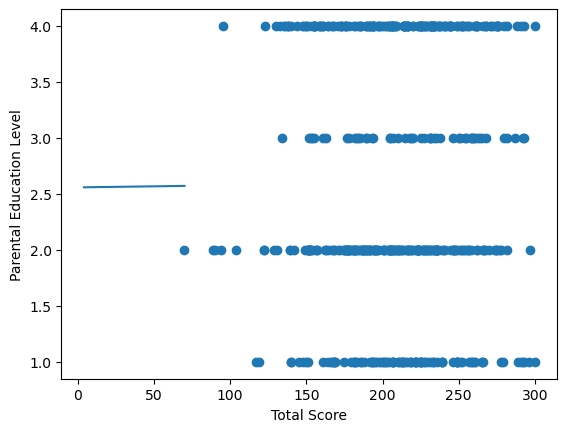

In [25]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
print(theta0, theta1)
def the_line(h, bias, coef):
    return bias + coef * h

min_score = working_set["Total_Score"].min()
min_education = the_line(min_score, theta0, theta1)
max_score = working_set["encoded_education_level"].max()
max_education = the_line(max_score, theta0, theta1)
line_x = [min_score, max_score]
line_y = [min_education, max_education]


import matplotlib.pyplot as plt
plt.scatter(working_set["Total_Score"], working_set["encoded_education_level"])
plt.xlabel("Total Score")
plt.ylabel("Parental Education Level")
plt.plot(line_x, line_y)
plt.show()

Looking at the graph this again does not look like a linear regression problem but on the above graph like other graph on the above graph y axis 1 represents bachelors degree, 2 represents some college, 3 represents master's degree, and 4 represents associate's degree and x axis the total score(math,writing and reading score).